# 1. Data Preparation and Visualization

### 1.1 Read data

In [63]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [64]:
data = sio.loadmat("./ex7/ex7data2.mat")
data.keys()
X = data["X"]
X.shape

(300, 2)

### 1.2 Visualize data

In [65]:
def plot_data():
    fig,ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1])
    plt.show()

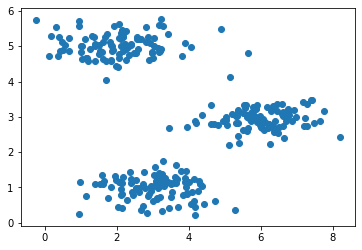

In [66]:
plot_data()

# 2. Model Implementation

### 2.1 Find centroids
First we need to choose k centriods and calculate the distance of each sample to the centroids we picked, and find the closest centriod to that sample

In [67]:
def find_centroids(X,centros):
    idx = [] # the final centroid of each X belongs to 
    for i in range(len(X)):
        #X[i].shape = (2,), centros.shape = (k,2) -> dist.shape=(k,2)
        dist = np.linalg.norm((X[i] - centros),axis =1) # (k,) here we are using 2-norm, meaning we are using the square root, but have no impact to compare the distance of X[i] to each centroids  
        id_i = np.argmin(dist) # get the index of the closest
        idx.append(id_i)
    return np.array(idx)

In [68]:
centros=np.array([[3,3],[6,2],[8,5]]) #k =3 ,meaning 3 clusters
idx = find_centroids(X,centros)
idx[:3] 

array([0, 2, 1], dtype=int64)

### 2.2 Relocate centroids 

In [69]:
def compute_centros(X,idx,k):
    """X:input space
       idx:which cluster a sample belongs to
       k: the number of clusters -- len(idx)"""
    centros = []
    for i in range(k):
        centros_i = np.mean(X[idx == i],axis = 0)
        centros.append(centros_i)
    return np.array(centros)

In [70]:
compute_centros(X,idx,k= 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### 2.3 Repeat 2.1 to 2.2 until converage 

In [71]:
def run_kmeans(X, centros, iters):
    k = len(centros)
    centros_all = [] #to show how the centroids moved when iterating
    centros_i = centros # the centros initialized at the beginning
    for i in range(iters):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X,idx,k)
        centros_all.append(centros_i)
    return idx, np.array(centros_all)

# 3. Performance Evaluation

### 3.1 Show how the centriods move with iteration

In [72]:
def plot_kmeans(X,centros_all, idx):
    fig,ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1], c=idx, cmap = "rainbow")
    ax.plot(centros_all[:,:,0],centros_all[:,:,1],"kx--")

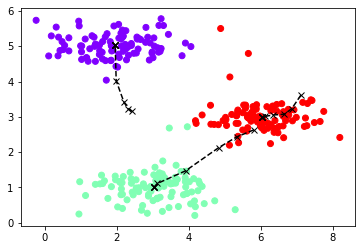

In [73]:
idx,centros_all=run_kmeans(X,centros,iters =10)
plot_kmeans(X,centros_all,idx)

### 3.2 How different the result will be if the position of initialized centroid is different

In [74]:
def init_centros(X, k):
    index = np.random.choice(len(X),k)
    return X[index]

In [75]:
init_centros(X,k =3)

array([[5.52908677, 3.33681576],
       [6.40773863, 2.67554951],
       [5.91280273, 2.85631938]])

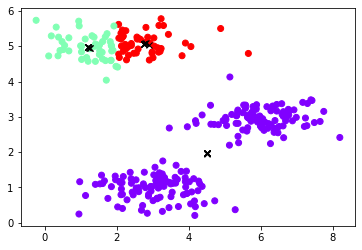

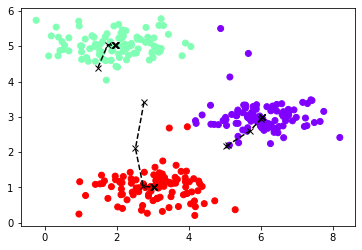

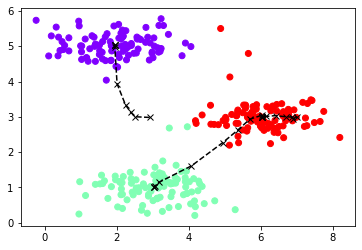

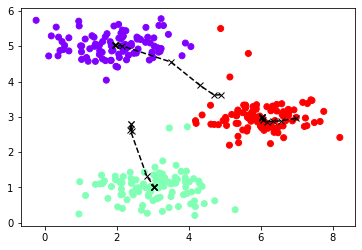

In [76]:
for i in range(4):
    idx,centros_all = run_kmeans(X,init_centros(X,k=3),iters =10)
    plot_kmeans(X, centros_all, idx)

# 4. Practice: Use Kmeans to compress a picture(use less color to show the same picture)

In [77]:
data=sio.loadmat("./ex7/bird_small.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [78]:
A= data["A"]
A.shape
# R,G,B

(128, 128, 3)

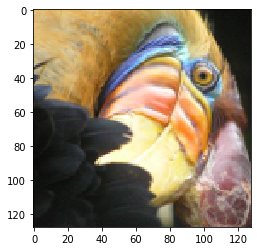

In [79]:
from skimage import io
image = io.imread("./ex7/bird_small.png")
plt.imshow(image)

Let's normalize r,g and b of each pixel

In [80]:
A = A / 255
A = A.reshape(-1,3)

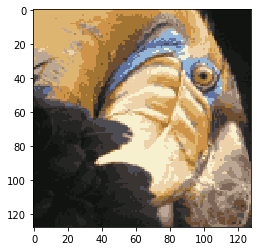

In [81]:
k = 16 #use 16 colors
idx,centros_all = run_kmeans(A,init_centros(A,k=16),iters =20)
centros = centros_all[-1]
im = np.zeros(A.shape) #init a picture 
for i in range(k):
    im[idx ==i] = centros[i]
im=im.reshape(128,128,3)
plt.imshow(im)

Now the size of compressed picture is much smaller than it was at the beginning, while the most of the info remains